In [2]:

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [3]:
ticker = 'AMZN'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']
data.head()

,AMZN
Date,
2010-01-04,133.899994
2010-01-05,134.690002
2010-01-06,132.250000
2010-01-07,130.000000
2010-01-08,133.520004


In [4]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,AMZN
Date,
2010-01-04,NaN
2010-01-05,0.005883
2010-01-06,-0.018282
2010-01-07,-0.017160
2010-01-08,0.026717


/home/hz/.virtualenvs/ml-gym/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

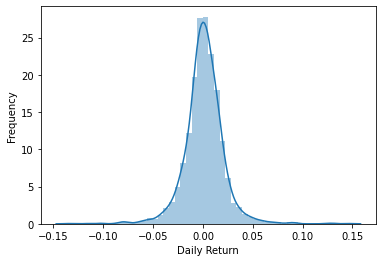

In [5]:

sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

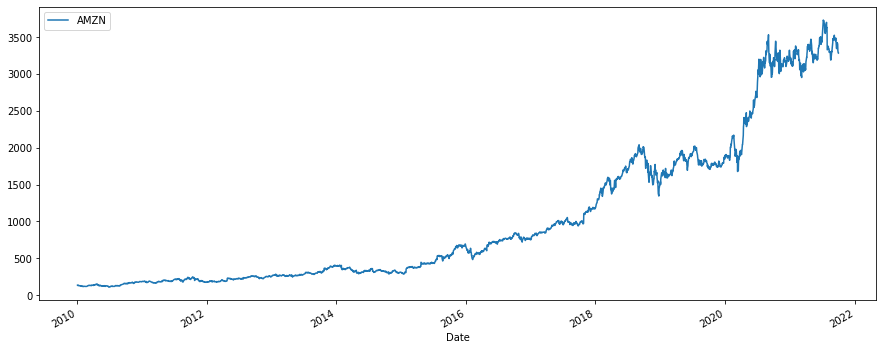

In [6]:
data.plot(figsize=(15,6))


<AxesSubplot:xlabel='Date'>

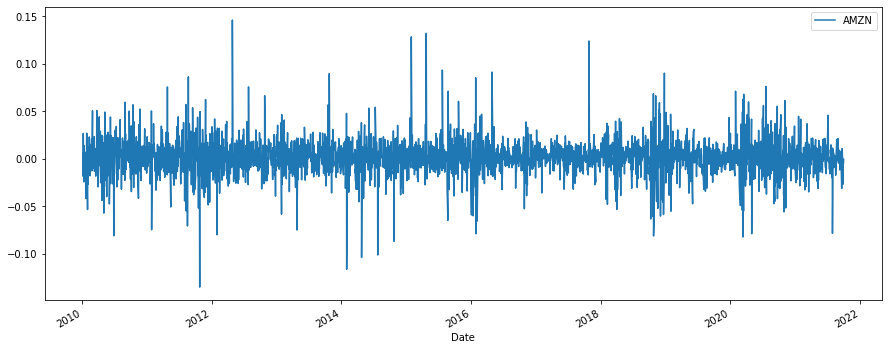

In [7]:
log_returns.plot(figsize=(15,6))

In [8]:
u = log_returns.mean()
var = log_returns.var()

In [9]:

drift = u - (0.5*var)
drift

AMZN    0.000889
dtype: float64

In [10]:
stddev = log_returns.std()


In [11]:

x = np.random.rand(10,2)
x

array([[0.34734218, 0.44454588],
       [0.69941395, 0.41113403],
       [0.77408849, 0.17849846],
       [0.72292015, 0.66144513],
       [0.98073163, 0.26267626],
       [0.38065483, 0.11019205],
       [0.82364335, 0.98392363],
       [0.83094219, 0.44751793],
       [0.21075555, 0.06323553],
       [0.20956521, 0.27558863]])

In [12]:
norm.ppf(x)


array([[-0.39250602, -0.13945356],
       [ 0.52271572, -0.2246288 ],
       [ 0.75237925, -0.92110248],
       [ 0.59153844,  0.41641038],
       [ 2.06909961, -0.63511638],
       [-0.30376143, -1.22550742],
       [ 0.92933926,  2.1425065 ],
       [ 0.95789516, -0.13193481],
       [-0.8038024 , -1.52816711],
       [-0.8079308 , -0.59599695]])

In [13]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[-1.85686782, -0.93948832,  1.60271468, ..., -0.0823482 ,
         1.88256677,  0.90567998],
       [ 0.6153108 ,  1.30455846, -0.96170729, ...,  1.10746425,
         0.79164523, -0.82079293],
       [ 1.34313654,  0.64236589, -0.08684793, ..., -0.03596679,
         0.08243486, -0.48300684],
       ...,
       [ 0.69468072,  1.06657704, -1.85102348, ...,  1.96770095,
        -1.01709354,  1.77104831],
       [-1.90737225,  0.3531172 , -1.45490348, ..., -0.86937545,
        -0.90164986,  0.08831938],
       [-0.34674996, -1.15235334, -1.02316295, ..., -0.72616819,
         0.33041943,  0.27791062]])

In [14]:
t_intervals = 1000
iterations = 10

In [15]:

daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

In [16]:

daily_returns

array([[0.99756018, 0.96497332, 0.98102831, ..., 1.02792977, 1.00714787,
        1.00910538],
       [1.00043685, 1.01190369, 0.99303155, ..., 0.99533794, 0.95532547,
        1.01358731],
       [1.00969156, 1.01022628, 0.98842877, ..., 1.01023175, 1.00551976,
        1.01205762],
       ...,
       [1.01279581, 0.98370167, 1.01587907, ..., 1.03704696, 1.04455355,
        0.98176815],
       [1.05825314, 0.98826065, 0.9827317 , ..., 1.00397656, 1.00440421,
        0.97514927],
       [0.99834508, 1.02728536, 1.00415814, ..., 0.99785388, 0.96419264,
        1.02990089]])

In [17]:

S0 = data.iloc[-1]
S0

AMZN    3283.26001
Name: 2021-10-01 00:00:00, dtype: float64

In [18]:
price_list = np.zeros_like(daily_returns)

In [19]:
price_list.shape

(50, 1000)

In [20]:
price_list[0] = S0
price_list

array([[3283.26000977, 3283.26000977, 3283.26000977, ..., 3283.26000977,
        3283.26000977, 3283.26000977],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [21]:

for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [22]:
price_list.shape

(50, 1000)

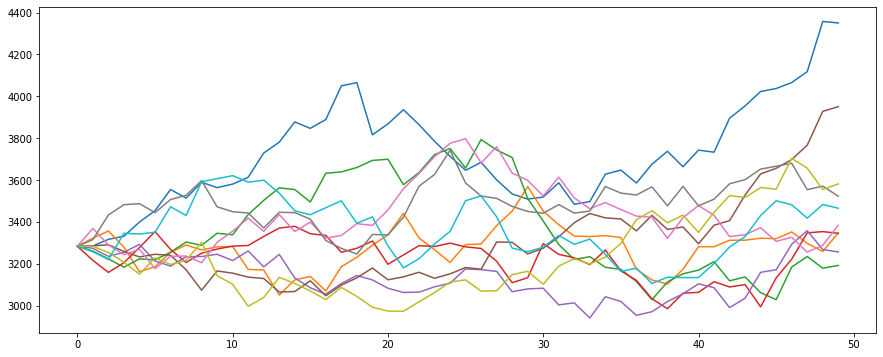

In [23]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/home/hz/.virtualenvs/ml-gym/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price after 50 days')

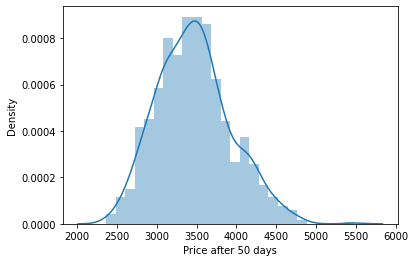

In [24]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

In [25]:
df = pd.DataFrame(price_list)


In [26]:

df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,...,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010,3283.260010
1,3284.694310,3322.342909,3260.380781,3215.733427,3273.851697,3285.176522,3368.879336,3315.117286,3283.213920,3257.145966,...,3209.441276,3405.899106,3290.995659,3273.339053,3234.801447,3301.553705,3401.193713,3267.953255,3136.581899,3327.870684
2,3316.528134,3356.318105,3222.654152,3158.467269,3234.872467,3290.492097,3289.733450,3433.309616,3253.392121,3220.055076,...,3171.945259,3365.513823,3335.552596,3357.407698,3211.539500,3353.996793,3325.501316,3301.390121,3153.895066,3367.996894
3,3331.517905,3278.655320,3183.533638,3204.832757,3254.721443,3258.693465,3243.618707,3482.089555,3207.573829,3345.352730,...,3321.063943,3325.006602,3379.374475,3376.588794,3252.657120,3246.930184,3335.460279,3277.760408,3202.726357,3355.828514
4,3399.182911,3161.581511,3222.962712,3277.295708,3292.480188,3232.377942,3269.162589,3486.920403,3150.125413,3341.947484,...,3257.579881,3368.457354,3350.529505,3263.738756,3268.485754,3253.755602,3202.182490,3329.083232,3141.047257,3327.261515


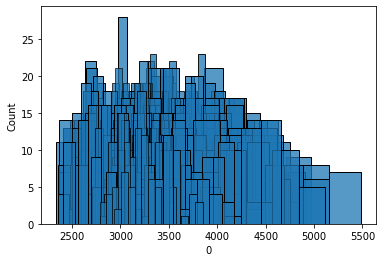

In [27]:
import seaborn as sns
for i in range(len(df.columns)):
    sns.histplot(df[i])